In [1]:
import os 
import pandas as pd
import cv2 as cv2
import matplotlib.pyplot as plt

# image_path = '/content/drive/MyDrive/Deep learning/Proyecto_1/tiny-imagenet-200'
image_path = './tiny-imagenet-200'

In [2]:
def read_file(file_path):
    """
    Reads a .txt file where each row is identified by the fourth separator '\t'.
    
    Parameters:
    file_path (str): The path to the .txt file.
    
    Returns:
    list: A list of lists where each inner list represents a row of the .txt file.
    """
    rows = []
    with open(file_path, 'r') as file:
        for line in file:
            # Remove the '\n' character from the end of the line
            line = line.rstrip('\n')
            # Split each line by '\t' delimiter
            row = line.split('\t')
            rows.append(row)
    return rows

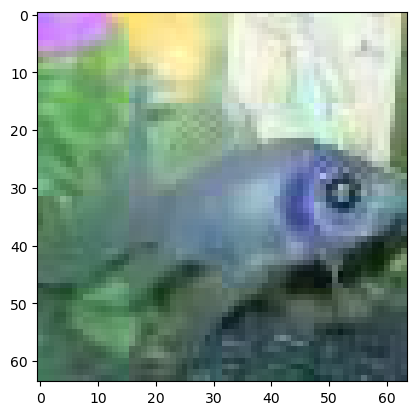

In [3]:
una_imagen = cv2.imread(os.path.join(image_path, 'train/n01443537/images/n01443537_0.JPEG'))
plt.imshow(una_imagen)

In [4]:
una_bbox = read_file('./tiny-imagenet-200/train/n01443537/n01443537_boxes.txt')
una_bbox

[['n01443537_0.JPEG', '0', '10', '63', '58'],
 ['n01443537_1.JPEG', '14', '2', '54', '49'],
 ['n01443537_2.JPEG', '0', '0', '63', '63'],
 ['n01443537_3.JPEG', '0', '16', '48', '54'],
 ['n01443537_4.JPEG', '15', '0', '51', '63'],
 ['n01443537_5.JPEG', '0', '0', '63', '63'],
 ['n01443537_6.JPEG', '13', '21', '52', '41'],
 ['n01443537_7.JPEG', '0', '0', '63', '63'],
 ['n01443537_8.JPEG', '0', '14', '37', '36'],
 ['n01443537_9.JPEG', '16', '18', '56', '53'],
 ['n01443537_10.JPEG', '1', '17', '58', '56'],
 ['n01443537_11.JPEG', '0', '0', '61', '52'],
 ['n01443537_12.JPEG', '4', '3', '61', '63'],
 ['n01443537_13.JPEG', '51', '7', '63', '16'],
 ['n01443537_14.JPEG', '34', '21', '63', '54'],
 ['n01443537_15.JPEG', '0', '1', '52', '56'],
 ['n01443537_16.JPEG', '0', '14', '32', '36'],
 ['n01443537_17.JPEG', '0', '8', '63', '58'],
 ['n01443537_18.JPEG', '0', '21', '41', '53'],
 ['n01443537_19.JPEG', '12', '6', '63', '59'],
 ['n01443537_20.JPEG', '17', '3', '52', '43'],
 ['n01443537_21.JPEG', '26'

In [5]:
def draw_bbox_on_image(image, bbox):
    """
    Draws a bounding box on an image using the provided coordinates.
    
    Parameters:
    image (numpy.ndarray): The image to draw the bounding box on.
    bbox (list): A list of four integers representing the bounding box coordinates in the format [x_min, y_min, x_max, y_max].
    
    Returns:
    numpy.ndarray: The image with the bounding box drawn on it.
    """
    # Convert bbox coordinates to integers
    bbox = [int(coord) for coord in bbox]
    # Draw the bounding box on the image
    image_with_bbox = cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)
    return image_with_bbox

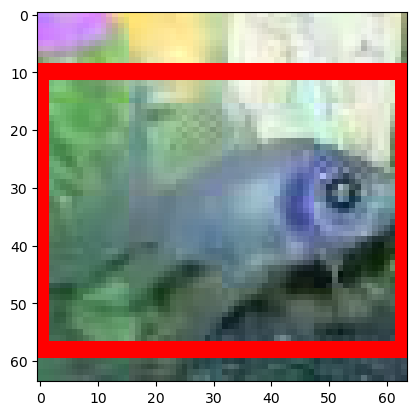

In [6]:
plt.imshow(draw_bbox_on_image(una_imagen, una_bbox[0][1:]))

# Using Class for Data Generation

In [1]:
from utils import DataPreparator

In [2]:
data = DataPreparator('./tiny-imagenet-200/train/', './tiny-imagenet-200/val/', './tiny-imagenet-200/test/')
train_data, val_data, test_data = data.returnData()

In [3]:
train_data 

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 50, 50, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None), (TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None)))>

In [4]:
val_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 50, 50, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None), (TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None)))>

In [5]:
test_data

<PrefetchDataset element_spec=TensorSpec(shape=(None, 50, 50, 3), dtype=tf.float32, name=None)>

In [6]:
#TODO: Queda pendiente hacer lo de las metricas y el modelo, ya esta lista la generación de los tensores para los datasets

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [8]:
my_input_tensor = Input(shape=(50, 50, 3))
my_vgg16 = VGG16(weights='imagenet', include_top=False, input_tensor=my_input_tensor)
my_vgg16.trainable = False
output_vgg16 = my_vgg16.output

x = Flatten()(output_vgg16)
x = Dense(3200, activation = 'relu')(x)
x = Dense(2400, activation = 'relu')(x)
x = Dense(1000, activation = 'relu')(x)
output_tensor_clasification = Dense(200, activation = 'softmax')(x)
output_rensor_regression = Dense(4)(x)

In [9]:
newVGG16 = Model(inputs = my_input_tensor, outputs = (output_tensor_clasification, output_rensor_regression))

In [10]:
newVGG16.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 50, 50, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 block1_conv2 (Conv2D)          (None, 50, 50, 64)   36928       ['block1_conv1[0][0]']           
                                                                                                  
 block1_pool (MaxPooling2D)     (None, 25, 25, 64)   0           ['block1_conv2[0][0]']           
                                                                                              

In [11]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate = 1e-4)
newVGG16.compile(loss = ['sparse_categorical_crossentropy','mse'], metrics='accuracy', optimizer = opt)

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model_checkpoint = ModelCheckpoint("newVGG16.h5", save_best_only=True, mode = 'min', monitor='val_loss')
early_stopping = EarlyStopping(patience=5)

In [13]:
h_vgg16 = newVGG16.fit(train_data, validation_data = val_data, epochs=100, verbose = 1, callbacks = [model_checkpoint, early_stopping])

Epoch 1/100
 114/3125 [>.............................] - ETA: 42:01 - loss: 949.2208 - dense_3_loss: 1.2454 - dense_4_loss: 947.9753 - dense_3_accuracy: 0.0066 - dense_4_accuracy: 0.0069

KeyboardInterrupt: 